In [1]:
import cv2 as cv
import SimpleITK as sitk

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Concatenate, UpSampling2D, Input
from tensorflow.keras.models import Model

import os 

In [2]:
image_path = 'D:/Project/ISIC2018_Training_Data/'    #defining the training image path
train = os.listdir(image_path)
len(train)

2000

In [3]:
ground_path = 'D:/Project/ISIC2018_Training_GroundTruth/'  #defining the training ground truth path
train_gt = os.listdir(ground_path)
len(train_gt)

2000

In [4]:
test_path = 'D:/Project/ISIC2018_Test_Data'     #defining the test image path
test= os.listdir(test_path)
len(test)

100

In [5]:
test_ground_path='D:/Project/ISIC2018_Test_GroundTruth'    #defining the test ground truth images
test_gt = os.listdir(test_ground_path)
len(test_gt)

100

In [6]:
val_path = 'D:/Project/ISIC2018_Validation_Data'     #defining the validation image path
val= os.listdir(val_path)
len(val)

90

In [7]:
val_path_gt = 'D:/Project/ISIC2018_Validation_GroundTruth'     #defining the validation image path
val_gt= os.listdir(val_path_gt)
len(val_gt)

90

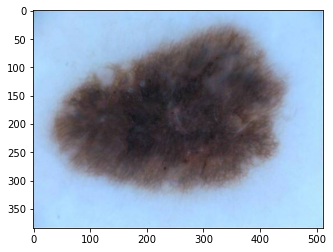

In [8]:
image_array=sitk.ReadImage(os.path.join(image_path,train[0]))           #reads the image
plt.imshow(sitk.GetArrayFromImage(image_array))                         #gets the array from that image
plt.show()

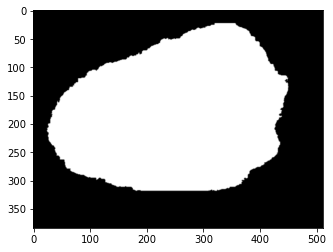

In [9]:
image_array2=cv.imread(os.path.join(ground_path,train_gt[0]))       #conversion to array in one step
plt.imshow(image_array2)
plt.show()

In [10]:
#making the directories
#please change path names according to where you want to save the files

if not os.path.exists('D:/Project/Lesion'):
    try:
        os.mkdir('D:/Project/Lesion/')
        os.mkdir('D:/Project/Lesion/Train')
        os.mkdir('D:/Project/Lesion/Train_gt')
        os.mkdir('D:/Project/Lesion/Test')
        os.mkdir('D:/Project/Lesion/Test_gt')
        os.mkdir('D:/Project/Lesion/Val')
        os.mkdir('D:/Project/Lesion/Val_gt')
    except OSError:
        print ("Creation of the directory %s failed")
    else:
        print ("Successfully created the directory")

Successfully created the directory


In [11]:
img_size = 256              #we will use 512 * 512 images from next steps

In [12]:
from skimage import io

# Create a blank array to store all the resized training images
# cv.resize to resize all the images to a particular size
# io.imsave to save the new images in a seperate folder to be accessed easily and faster
# append to join all the new images to the blank array

training_data=[]

def create_training_data():
    
    for images in train:     
        
        img=sitk.ReadImage(os.path.join(image_path,images))
        img_array=sitk.GetArrayFromImage(img)
        new_array=cv.resize(img_array,(img_size,img_size))
        
        io.imsave('D:/Project/Lesion/Train/' + images[:-4] + '.png', new_array) #change path location

        training_data.append([new_array])

In [13]:
create_training_data()

In [14]:
ground_truth_data=[]

def create_ground_truth_data():
    
    for images in train_gt:
        
        img = sitk.ReadImage(os.path.join(ground_path,images))
        img_array1= sitk.GetArrayFromImage(img)
        new_array1=cv.resize(img_array1,(img_size,img_size))
        
        io.imsave('D:/Project/Lesion/Train_gt/' + images[:-4] + '.png', new_array1) #change path location
        
        ground_truth_data.append([new_array1])

In [15]:
create_ground_truth_data()

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0006815_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0012179_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0012376_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0012406_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWar

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0013970_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0014187_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0014248_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Train_gt/ISIC_0014286_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWar

In [16]:
test_data=[]

def create_test_data():
    
    for images in test:
      
        img = sitk.ReadImage(os.path.join(test_path,images))
        img_array2 = sitk.GetArrayFromImage(img)
        new_array2=cv.resize(img_array2,(img_size,img_size))
        
        io.imsave('D:/Project/Lesion/Test/' + images[:-4] + '.png', new_array2) #change path location

        training_data.append([new_array2])

In [17]:
create_test_data()

In [18]:
test_GT_data=[]

def create_test_GT_data():
    
    for images in test_gt:
      
        img = sitk.ReadImage(os.path.join(test_ground_path,images))
        img_array3 = sitk.GetArrayFromImage(img)
        new_array3= cv.resize(img_array3,(img_size,img_size))
        
        io.imsave('D:/Project/Lesion/Test_gt/' + images[:-4] + '.png', new_array3) #change path location

        training_data.append([new_array3])

In [19]:
create_test_GT_data()

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Test_gt/ISIC_0006815_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()


In [20]:
val_data=[]

def create_val_data():
    
    for images in val:
      
        img = sitk.ReadImage(os.path.join(val_path,images))
        img_array2 = sitk.GetArrayFromImage(img)
        new_array2=cv.resize(img_array2,(img_size,img_size))
        
        io.imsave('D:/Project/Lesion/Val/' + images[:-4] + '.png', new_array2) #change path location

        training_data.append([new_array2])

In [21]:
create_val_data()

In [22]:
val_GT_data=[]

def create_val_GT_data():
    
    for images in val_gt:
      
        img = sitk.ReadImage(os.path.join(val_path_gt,images))
        img_array3 = sitk.GetArrayFromImage(img)
        new_array3= cv.resize(img_array3,(img_size,img_size))
        
        io.imsave('D:/Project/Lesion/Val_gt/' + images[:-4] + '.png', new_array3) #change path location

        training_data.append([new_array3])

In [23]:
create_val_GT_data()

C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Val_gt/ISIC_0016027_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: D:/Project/Lesion/Val_gt/ISIC_0016053_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
